In [5]:
import matplotlib.pyplot as plt
import numpy as np

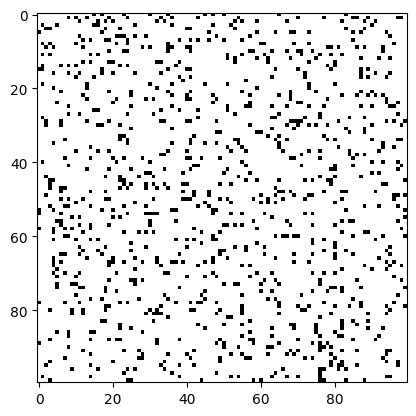

In [7]:
n = 100 # size of space
p = 0.1 # probability of initially panicky individuals

def initialize():
    global config, nextconfig
    config = np.zeros([n,n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if np.random.rand() < p else 0
    nextconfig = np.zeros_like(config)

def observe(ax = None):
    global config, nextconfig
    if ax is None:
        _, ax = plt.subplots()
    ax.cla()
    ax.imshow(config, vmin=0, vmax=1, cmap='binary')

# State-transition function needs to count the number of panicky
# individuals within a neighborhood. 
def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config


initialize()
observe()

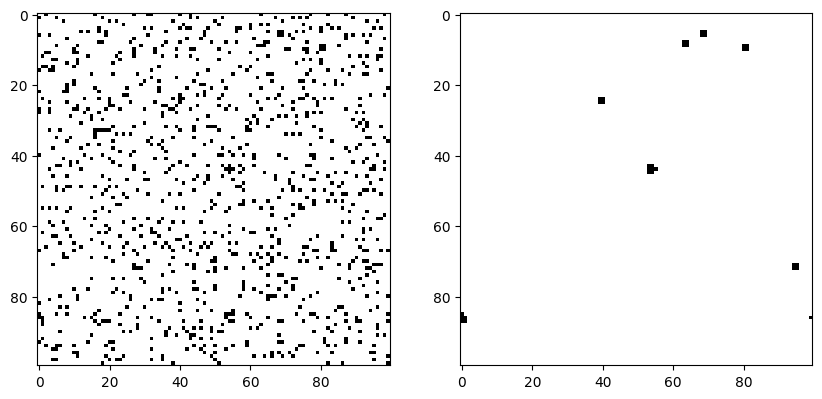

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

initialize()
observe(ax[0])
for _ in range(20):
    update()

observe(ax[1])

Game of Life: using Moore neighborhood
* a cell turns active if it is surrounded by exactly three cells
* a cell turns inactive if it is not surrounded by two or three other living cells

In [52]:
np.round(np.array(config.shape)/2).astype(int)

array([6, 6])

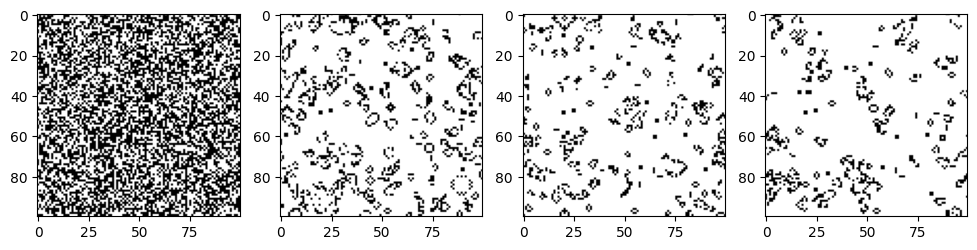

In [75]:
n = 100 # size of space
# n = 11 # size of space
p = 0.5 # probability of initially panicky individuals
density = []

def initialize():
    global config, nextconfig
    config = np.zeros([n,n], dtype=int)
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if np.random.rand() < p else 0
    nextconfig = np.zeros_like(config)
    # config = np.zeros([n,n], dtype=int)
    # y_mid, x_mid = np.round(np.array(config.shape) / 2).astype(int)
    # config[y_mid, x_mid-1:x_mid+2] = 1
    # config[y_mid-1:y_mid+2, x_mid] = 1
    # nextconfig = np.zeros_like(config)
    
def observe(ax = None):
    global config, nextconfig
    if ax is None:
        _, ax = plt.subplots()
    ax.cla()
    ax.imshow(config, vmin=0, vmax=1, cmap='binary')

# State-transition function needs to count the number of panicky
# individuals within a neighborhood. 
def sum_moore_neighborhood(x, y, include_self: bool = True) -> int:
    global config
    count = 0
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            count += config[(x + dx) % n, (y + dy) % n]
    if not include_self:
        count -= config[x, y]
    return int(count)
    
def calc_density():
    global config
    return config.sum() / config.size

def update():
    global config, nextconfig, density
    nextconfig = config.copy()
    for x in range(n):
        for y in range(n):
            count = sum_moore_neighborhood(x, y, include_self=False)
            # if currently inactive and surrounded by 3 active cells, activate
            if config[x,y] == 0 and count == 3:
                nextconfig[x, y] = 1
            # if currently active, deactivate if not surrounded by 2 or 3 other living cells
            elif (config[x,y] == 1) and (count != 2 and count != 3):
                nextconfig[x, y] = 0

    config, nextconfig = nextconfig, config
    density.append(calc_density())


fig, ax = plt.subplots(figsize=(12,3), ncols=4)
initialize()
density.append(calc_density())
step_size = 30
observe(ax[0])
for _ in range(step_size):
    update()
observe(ax[1])
for _ in range(step_size):
    update()
observe(ax[2])
for _ in range(step_size):
    update()
observe(ax[3])

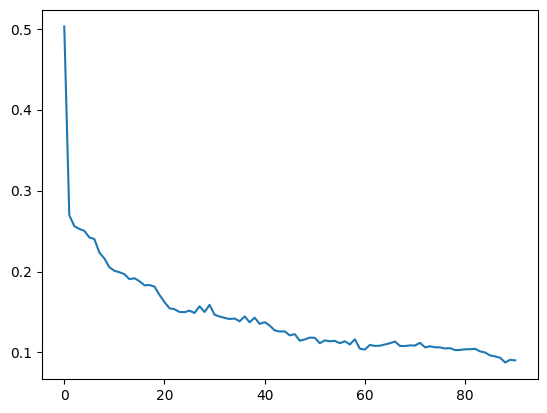

In [76]:
plt.plot(density)

In [64]:
density

[0.1652892561983471, 0.18181818181818182, 0.19834710743801653]

## Exercise 11.3.2

Modify Code 11.5 to implement a simulator of the majority rule CA in a two-dimensional space. Then answer the following questions by conducting simulations:

• What happens if you change the ratio of binary states in the initial condition?

• What happens if you increase the radius of the neighborhoods?

• What happens if you increase the number of states?

* **Majority rule**: each cell switches its state to a local majority choice within its (Moore) neighborhood. This includes itself, for a total of 9 states considered.

In [90]:
radius = 2
list(range(-radius, radius+1, 1))

[-2, -1, 0, 1, 2]

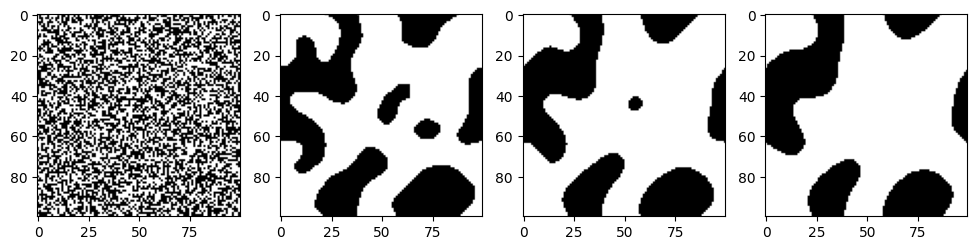

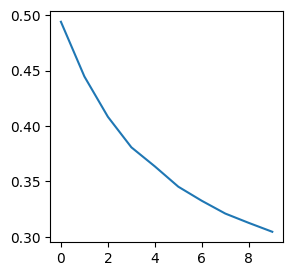

In [108]:
n = 100 # size of space
p = 0.5 # probability of initially active
radius = 5
density = []

def initialize():
    global config, nextconfig
    config = np.zeros([n,n], dtype=int)
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if np.random.rand() < p else 0
    nextconfig = np.zeros_like(config)
    
def observe(ax = None):
    global config, nextconfig
    if ax is None:
        _, ax = plt.subplots()
    ax.cla()
    ax.imshow(config, vmin=0, vmax=1, cmap='binary')

def sum_moore_neighborhood(x, y, include_self: bool = True, radius: int = 1) -> int:
    """Helper function for summing 'votes' in the cell (x,y)'s
    Moore neighborhood.
    """
    global config
    count = 0
    for dx in range(-radius, radius+1, 1):
        for dy in range(-radius, radius+1, 1):
            count += config[(x + dx) % n, (y + dy) % n]
    if not include_self:
        count -= config[x, y]
    return int(count)
    
def calc_density():
    """Helper for calculating a density metric of the simulation."""
    global config
    return config.sum() / config.size


def update():
    global config, nextconfig, density
    nextconfig = config.copy()
    for x in range(n):
        for y in range(n):
            count = sum_moore_neighborhood(x, y, include_self=True, radius=radius)
            nextconfig[x, y] = int(np.round(count / ((2*radius + 1)**2)))

    config, nextconfig = nextconfig, config
    density.append(calc_density())


fig, ax = plt.subplots(figsize=(12,3), ncols=4)
initialize()
density.append(calc_density())
step_size = 3
observe(ax[0])
for _ in range(step_size):
    update()
observe(ax[1])
for _ in range(step_size):
    update()
observe(ax[2])
for _ in range(step_size):
    update()
observe(ax[3])

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(density)

Increase the number of states

In [133]:
from matplotlib import colors

n = 100 # size of space
radius = 5
states = {0,1,2}

def initialize():
    global config, nextconfig
    config = np.random.choice(a=[0,1,2], size=(n,n)).astype(int)
    nextconfig = np.zeros_like(config)
    
def observe(ax = None):
    cmap = colors.ListedColormap(['white', 'gray', 'black'])
    bounds = [0, 1, 2, 3]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    global config, nextconfig
    if ax is None:
        _, ax = plt.subplots()
    ax.cla()
    ax.imshow(config, cmap=cmap, norm=norm)

def get_majority_vote(x, y, include_self: bool = True, radius: int = 1) -> int:
    """Helper function for finding majority vote."""
    global config
    counts = np.zeros(len(states))
    for dx in range(-radius, radius+1, 1):
        for dy in range(-radius, radius+1, 1):
            val = config[(x + dx) % n, (y + dy) % n]
            counts[val] += 1
    if not include_self:
        val = config[(x + dx) % n, (y + dy) % n]
        counts -= config[x, y]
        counts[val] -= 1
    return np.argmax(counts)
    
def calc_density():
    """Helper for calculating a density metric of the simulation."""
    global config
    return config.sum() / config.size


def update():
    global config, nextconfig, density
    nextconfig = config.copy()
    for x in range(n):
        for y in range(n):
            nextconfig[x, y] = get_majority_vote(x, y, include_self=True, radius=radius)

    config, nextconfig = nextconfig, config
    # density.append(calc_density())


fig, ax = plt.subplots(figsize=(12,3), ncols=4)
initialize()
# density.append(calc_density())
step_size = 5
observe(ax[0])
for _ in range(step_size):
    update()
observe(ax[1])
for _ in range(step_size):
    update()
observe(ax[2])
for _ in range(step_size):
    update()
observe(ax[3])

# fig, ax = plt.subplots(figsize=(3,3))
# ax.plot(density)